# Flipkart best Laptops

### Importing important libraries

In [49]:
from bs4 import BeautifulSoup as Soup
import requests
import re
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
result = requests.get(url)
print(url)
print(result)

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off
<Response [200]>


In [3]:
content = result.text
soup1 = Soup(content, 'html.parser')

In [4]:
pages_link = soup1.find_all('a',class_='ge-49M')
domain = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="

for i in range(2,41):
    link = domain+str(i)
    page_data = requests.get(link)
    content1 = page_data.text
    content += content1
    

In [5]:
soupdata = Soup(content, 'html.parser')
type(soupdata)

bs4.BeautifulSoup

In [6]:
containers = soupdata.find_all('div', class_='_2kHMtA')
print(type(containers), len(containers))

<class 'bs4.element.ResultSet'> 912


In [7]:
f = open('laptops_info.csv','wb')
f.write('ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage\n'.encode())


for container in containers:
    #Finding Product Name
    product = container.find('div', class_='_4rR01T')
    ProductName= product.text.split('-')[0].strip()
    
    # Finding Stars
    star = container.find('div', class_='_3LWZlK')
    try:
        Stars = star.text
    except:
        Stars = 0
    
    # Finding Ratings & Reviews
    Rating = container.find('span', class_='_2_R_DZ')
    try:
        ratRev = re.findall('\d+,?\d*', Rating.text)
        Ratings = ratRev[0].replace(',','')
        Reviews = ratRev[1].replace(',','')
    except:
        Ratings = 0
        Reviews = 0
    
    #Finding Current Price
    CurrentPrice = container.find('div', class_='_30jeq3 _1_WHN1').text.replace(',','').replace('₹','')
    
    #Find MRP
    mrp = container.find('div',class_='_3I9_wc _27UcVY')
    try:
        MRP = mrp.text.replace(',','').replace('₹','')
    except:
        MRP = 0
        
    #Finding Information about the product
    info = container.findAll('li',class_='rgWa7D')
    Processor = info[0].text
    Ram = info[1].text
    Storage = info[3].text

    print(ProductName, Stars, Ratings, Reviews, CurrentPrice, MRP, Processor, Ram, Storage)
    f.write(f"{ProductName},{Stars},{Ratings},{Reviews},{CurrentPrice},{MRP},{Processor},{Ram},{Storage}\n".encode())
    print('\n')

f.close()


acer Extensa Core i3 11th Gen 4.2 657 74 34757 43999 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD


Lenovo IdeaPad Core i3 11th Gen 4.3 370 31 39990 59890 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD


ASUS VivoBook 15 (2022) Core i3 10th Gen 4.3 9336 936 33990 50990 Intel Core i3 Processor (10th Gen) 8 GB DDR4 RAM 512 GB SSD


HP Ryzen 5 Hexa Core 5500U 4.3 924 72 46477 59778 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD


HP Celeron Dual Core 0 0 0 25990 36965 Intel Celeron Dual Core Processor 8 GB DDR4 RAM 256 GB SSD


ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5 Hexa Core AMD R5 4.4 1139 146 57676 71990 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD


Lenovo IdeaPad 3 Celeron Dual Core 4.1 294 31 28490 40490 Intel Celeron Dual Core Processor 8 GB DDR4 RAM 256 GB SSD


Lenovo IdeaPad 3 Core i3 11th Gen 4.2 157 15 35400 48490 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 256 GB SSD


ASUS TUF Gaming F15 Core i5 10th Gen 4.4 4178

ASUS Vivobook Pro 14X OLED with ASUS DialPad Ryzen 9 Octa Core 5900HX 3.9 12 2 101990 149990 AMD Ryzen 9 Octa Core Processor 8 GB DDR4 RAM 1 TB SSD


acer Predator Helios 300 Core i7 10th Gen 4.5 1557 206 105990 149999 Free upgrade to Windows 11 when available Intel Core i7 Processor (10th Gen) 64 bit Windows 10 Operating System


Lenovo Yoga Slim 7 Core i7 10th Gen 4.5 10 3 95490 132890 Intel Core i7 Processor (10th Gen) 8 GB LPDDR4X RAM 512 GB SSD


Lenovo Ideapad Slim 5 Ryzen 7 Octa Core 4700U 4.4 689 81 60490 60990 AMD Ryzen 7 Octa Core Processor 8 GB DDR4 RAM 512 GB SSD


ASUS VivoBook Ultra 17 Ryzen 5 Hexa Core AMD R5 4.2 198 37 54990 78990 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 1 TB HDD|256 GB SSD


acer Predator Helios 300 Core i7 10th Gen 4.5 1557 206 105990 149999 Free upgrade to Windows 11 when available Intel Core i7 Processor (10th Gen) 64 bit Windows 10 Operating System


DELL Inspiron Core i5 11th Gen 0 0 0 77990 101639 Intel Core i5 Processor (11th Gen) 16 GB DDR

In [50]:
data = pd.read_csv("laptops_info.csv",on_bad_lines='skip')
data

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage
0,acer Extensa Core i3 11th Gen,4.2,657,74,34757,43999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD
1,Lenovo IdeaPad Core i3 11th Gen,4.3,370,31,39990,59890,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9336,936,33990,50990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD
3,HP Ryzen 5 Hexa Core 5500U,4.3,924,72,46477,59778,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD
4,HP Celeron Dual Core,0.0,0,0,25990,36965,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD
...,...,...,...,...,...,...,...,...,...
879,Lenovo IdeaPad Flex 5 Ryzen 5 Hexa Core 5500U,0.0,0,0,62500,95090,AMD Ryzen 5 Hexa Core Processor,16 GB LPDDR4X RAM,512 GB SSD
880,HP Core i7 12th Gen,4.0,7,0,92500,101200,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM,1 TB SSD
881,Lenovo IdeaPad Core i3 10th Gen,4.2,64,8,37890,50990,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,256 GB SSD
882,MSI Vector GP66 Core i7 12th Gen,0.0,0,0,205000,227990,Intel Core i7 Processor (12th Gen),16 GB DDR5 RAM,1 TB SSD


In [51]:
data.shape

(884, 9)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   884 non-null    object 
 1   Stars         884 non-null    float64
 2   Ratings       884 non-null    int64  
 3   Reviews       884 non-null    int64  
 4   CurrentPrice  884 non-null    int64  
 5   MRP           884 non-null    int64  
 6   Processor     884 non-null    object 
 7   Ram           884 non-null    object 
 8   Storage       884 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 62.3+ KB


In [53]:
df = data.drop_duplicates(['Stars','Ratings','Reviews','CurrentPrice','MRP'])
df.shape

(648, 9)

### Find the Product having highest Reviews

In [54]:
df[df['Reviews']==max(df['Reviews'])]

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage
594,realme Book (Slim) Core i3 11th Gen,4.4,12115,1821,46990,54999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD


In [55]:
top_5 = data.sort_values(by='Reviews', ascending = False).head()

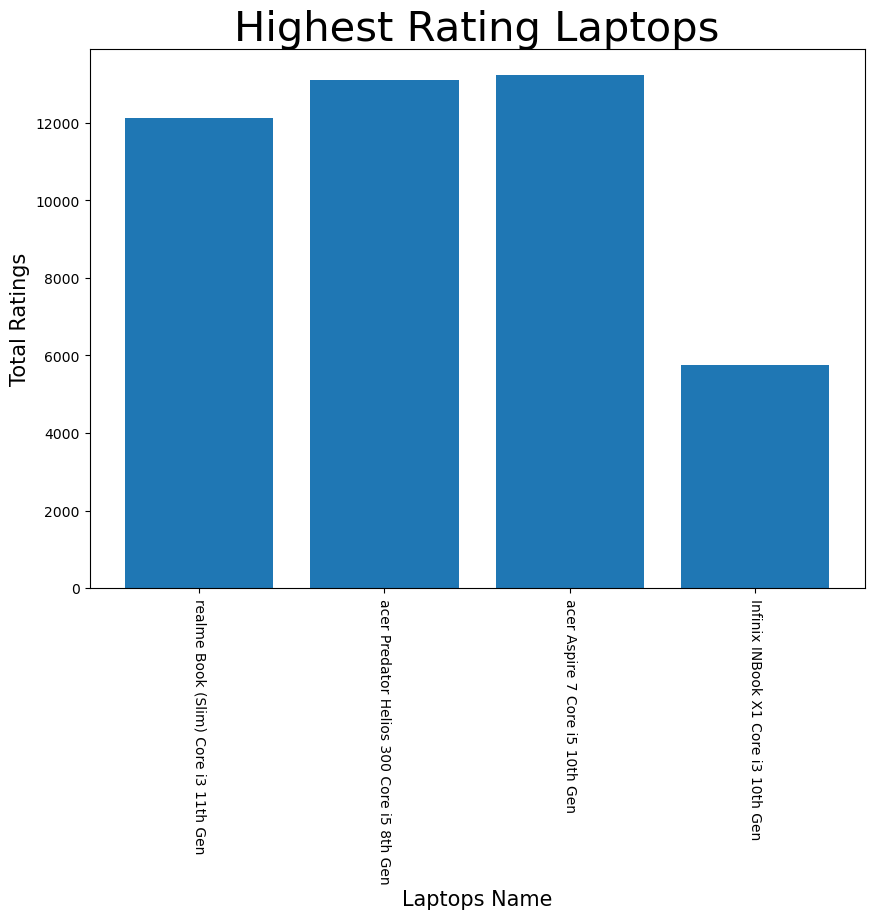

In [56]:
plt.figure(figsize=(10,7))
plt.bar(x=top_5['ProductName'], height = top_5['Ratings'])
plt.title('Highest Rating Laptops', fontsize=30)
plt.xlabel('Laptops Name', fontsize=15)
plt.ylabel('Total Ratings', fontsize=15)
plt.xticks(rotation = 270)

plt.show()

### Find the Product Having highest Stars

In [57]:
df.sort_values(by='Stars', ascending = False).head(5)

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage
460,Lenovo IdeaPad 3 Celeron Dual Core,5.0,2,1,30100,36999,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,256 GB SSD
466,acer Aspire 5 Ryzen 7 Octa Core 5700U,5.0,3,0,59990,79999,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,512 GB SSD
727,acer Predator Helios 300 Core i9 11th Gen,5.0,7,1,139999,169999,Intel Core i9 Processor (11th Gen),16 GB DDR4 RAM,1 TB SSD
709,ASUS ROG Flow X13 with RTX 3080 eGPU Ryzen 9 O...,5.0,4,0,239990,350990,AMD Ryzen 9 Octa Core Processor,32 GB LPDDR4X RAM,1 TB SSD
701,MSI Creator 17 Core i7 10th Gen,5.0,3,1,177990,313990,Intel Core i7 Processor (10th Gen),32 GB DDR4 RAM,1 TB SSD


### Most Affordable Laptops

In [58]:
Lowest_price = df.sort_values(by='CurrentPrice', ascending = True).head(10)
Lowest_price

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage
313,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,1638,256,15990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display
366,ASUS Chromebook Celeron Dual Core,3.7,1455,197,18490,25990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,39.62 cm (15.6 inch) Display
29,Lenovo Athlon Dual Core 3050U,0.0,0,0,18990,36000,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,1 TB HDD
33,Lenovo Athlon Dual Core 3050U,0.0,0,0,18990,29999,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,256 GB SSD
137,Lenovo Celeron Dual Core,3.8,90,7,19490,36000,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,256 GB HDD|256 GB SSD
26,Lenovo Athlon Dual Core 3050U,5.0,3,0,20990,35000,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,256 GB SSD
615,ASUS EeeBook 12 Celeron Dual Core 4th Gen,3.9,197,20,20990,27990,Intel Celeron Dual Core Processor (4th Gen),4 GB DDR4 RAM,29.46 cm (11.6 inch) Display
707,ASUS EeeBook 12 Celeron Dual Core,4.2,13,0,21990,27990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,29.46 cm (11.6 Inch) Display
711,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,1638,256,22990,29990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display
115,acer Aspire 3 Dual Core 3020e,4.1,607,58,22990,34999,AMD Dual Core Processor,4 GB DDR4 RAM,256 GB SSD


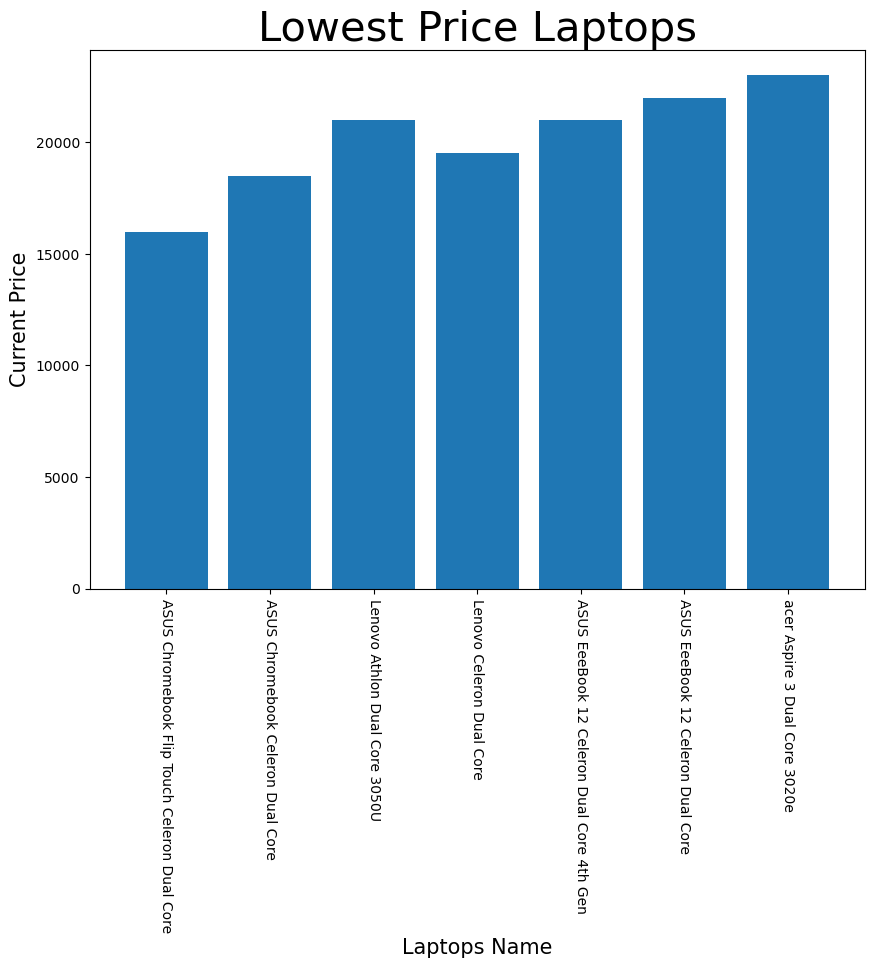

In [41]:
plt.figure(figsize=(10,7))
plt.bar(x=Lowest_price['ProductName'], height = Lowest_price['CurrentPrice'])
plt.title('Lowest Price Laptops', fontsize=30)
plt.xlabel('Laptops Name', fontsize=15)
plt.ylabel('Current Price', fontsize=15)
plt.xticks(rotation = 270)

plt.show()

In [59]:
df[df['CurrentPrice']<45000]

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage
0,acer Extensa Core i3 11th Gen,4.2,657,74,34757,43999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD
1,Lenovo IdeaPad Core i3 11th Gen,4.3,370,31,39990,59890,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9336,936,33990,50990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD
4,HP Celeron Dual Core,0.0,0,0,25990,36965,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD
6,Lenovo IdeaPad 3 Celeron Dual Core,4.1,294,31,28490,40490,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD
...,...,...,...,...,...,...,...,...,...
853,Ultimus S152 Celeron Dual Core,0.0,0,0,23990,29999,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,256 GB SSD
857,HP Core i3 10th Gen,3.9,44,3,39643,0,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,1 TB HDD
869,HP 15s Pentium Gold,3.8,2605,313,29539,29632,Intel Pentium Gold Processor,4 GB DDR4 RAM,1 TB HDD
876,DELL Inspiron 3510 Pentium Quad Core 11th Gen,0.0,0,0,36500,40000,Intel Pentium Quad Core Processor (11th Gen),4 GB DDR4 RAM,256 GB SSD
